Logistic regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the file
from google.colab import drive

drive.mount('/content/drive')

# from google.colab import files
# upload = files.upload()
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df.head(5)

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# count the number of rows and columns in dataset
df.shape

(569, 33)

In [ ]:
# count of the nember empty (na,nan,) values in each column
df.isna().sum()



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# get rid off empty columns (drop the missing column)
df = df.dropna(axis=1)


In [ ]:
# new count of the rows and column
df.shape

(569, 32)

In [ ]:
# get a count of teh number of malignant (M) or Benign (B)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

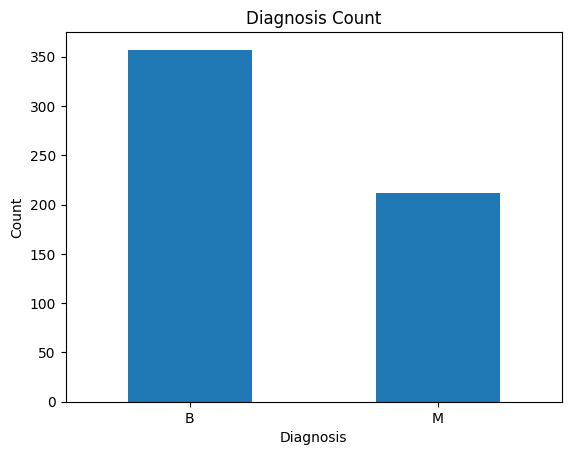

In [ ]:
import matplotlib.pyplot as plt

df['diagnosis'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Count')
plt.show()


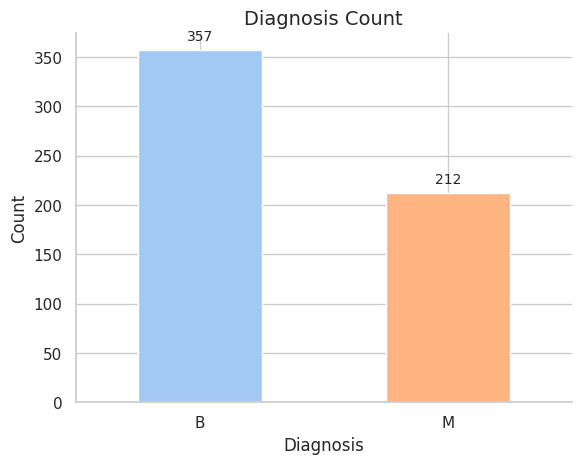

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a color palette for the bars
colors = sns.color_palette("pastel")

# Plot the bar chart
ax = df['diagnosis'].value_counts().plot(kind='bar', color=colors, rot=0)

# Customize plot labels and title
ax.set_xlabel('Diagnosis', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Diagnosis Count', fontsize=14)

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


In [ ]:
# Check the data type to observe if any column required to encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# encode the categorical data value
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.iloc[:,1]


<ipython-input-11-3701fc177f6d>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

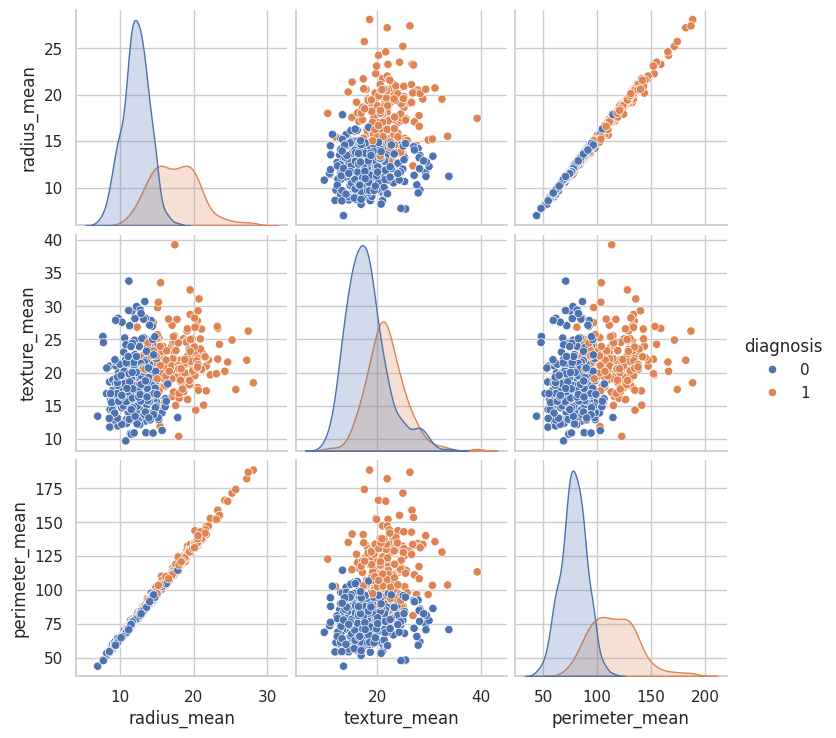

In [ ]:
# Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue = 'diagnosis')


In [ ]:
# print the first 5 row of new dataset
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# get the co-relation of the column
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

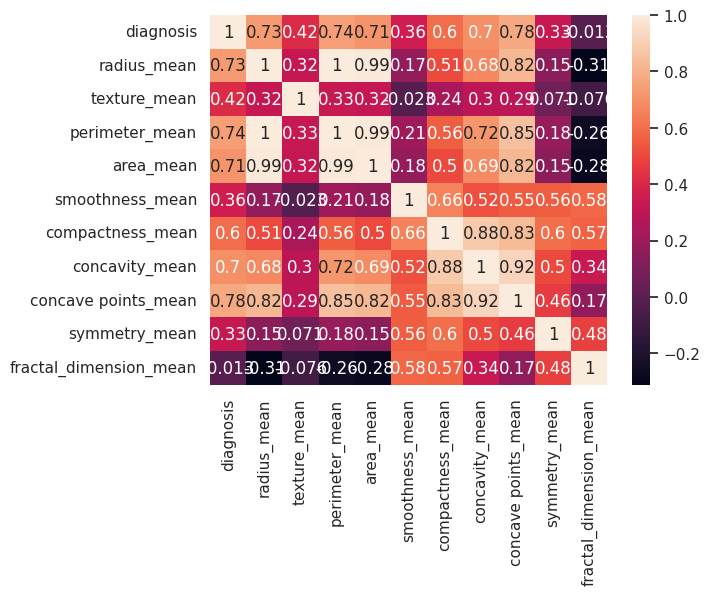

In [ ]:
import seaborn as sns
# visualise the corelation
sns.heatmap(df.iloc[:,1:12].corr(), annot=True)

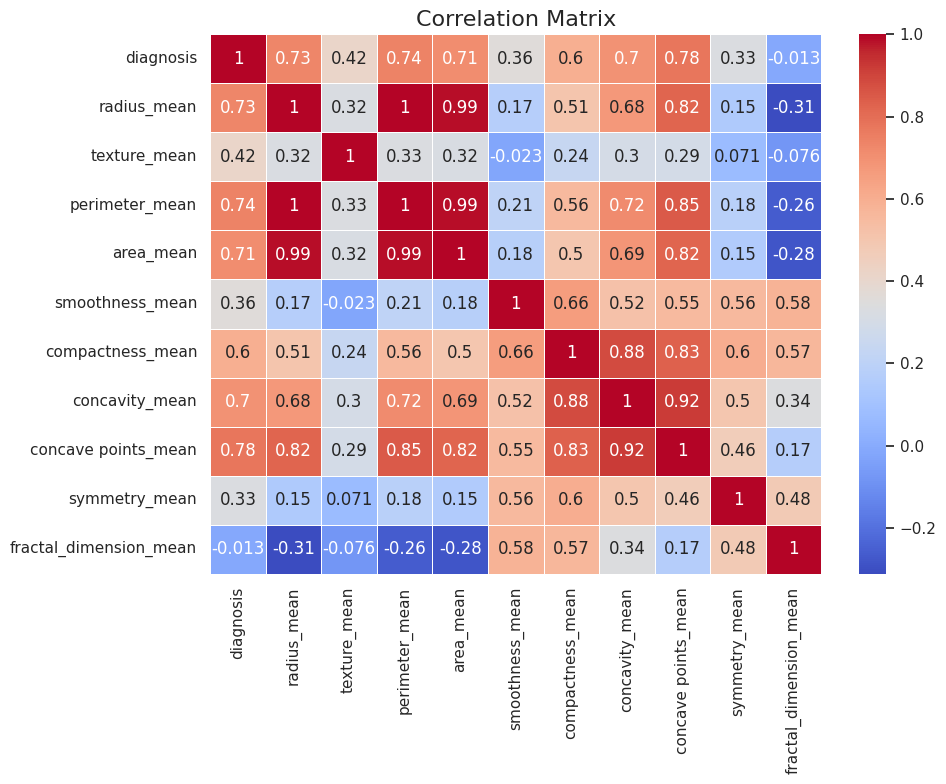

In [ ]:
correlation_matrix = df.iloc[:, 1:12].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations, using a diverging color map
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', linewidths=.5)

# Add title and adjust plot layout
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# spilt the dataste into independemt(X) and dependent(Y) data sets:
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values



In [ ]:
#Split the data set into 25 % testing and 75% traning
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state= 0)

In [ ]:
# scale the data (feature scaling)
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [ ]:
def models(X_train, Y_train, algorithm='svm', kernel='rbf', C=1.0):
    if algorithm == 'svm':
        # K-nearest neighbors
        svm_classifier = svm.SVC(kernel=kernel, C=C)
        svm_classifier.fit(X_train, Y_train)

        # Print the model accuracy on the training set
        train_accuracy = svm_classifier.score(X_train, Y_train)
        print('SVM Training Accuracy:', train_accuracy)
        return svm_classifier
    else:
        print("Invalid algorithm. Please choose 'knn'.")

In [ ]:
# Specify the number of neighbors for KNN (you can change this value)
model = models(X_train, Y_train, algorithm='svm', kernel='rbf', C=1.0)
y_pred = model.predict(X_test)

SVM Training Accuracy: 0.9824120603015075


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming your logistic regression model is named 'model'
# and you have already trained it on your training data

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print('Testing accuracy = ', (TP +TN)/(TP + TN + FN +FP))


Confusion Matrix:
[[107   1]
 [  3  60]]
Testing accuracy =  0.9766081871345029


In [ ]:
# SHOW ANOTHER TO GET MATRIX OF THE MODEL
from sklearn.metrics import classification_report, accuracy_score

model = models(X_train, Y_train, algorithm='svm', kernel='rbf', C=1.0)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))


SVM Training Accuracy: 0.9824120603015075
Accuracy Score: 0.9766081871345029
Confusion Matrix:
[[107   1]
 [  3  60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Confusion Matrix:
[[107   1]
 [  3  60]]
Testing accuracy =  0.9766081871345029


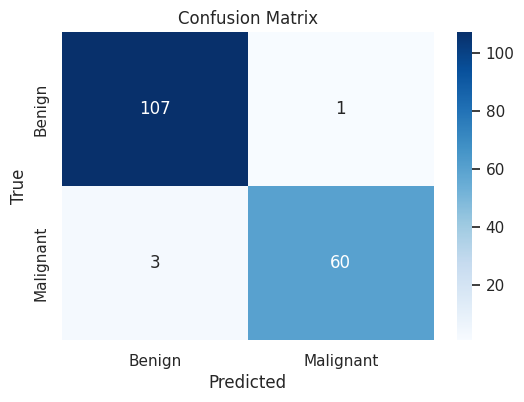

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print('Testing accuracy = ', (TP +TN)/(TP + TN + FN +FP))

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion Matrix:
[[107   1]
 [  3  60]]
Testing accuracy =  0.9766081871345029


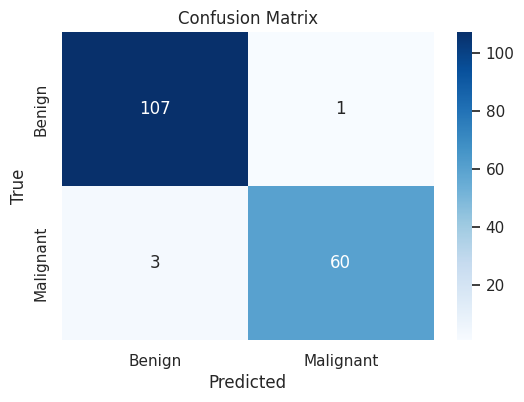

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print('Testing accuracy = ', (TP +TN)/(TP + TN + FN +FP))

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()